# Analysis of job opportunities


## Project Context : 

As a Data developer, as part of this project we want to carry out an in-depth analysis of the labor market in the emerging fields in order to better target our recruitment, talent acquisition and skills development initiatives.

We also want to visualize the results in a clear and informative way, allowing stakeholders to better understand the conclusions drawn from the analysis.

In addition, we are looking to set up a data storage system to facilitate the management and access to the information collected throughout the project.

### Importing The Necessary Libraries

In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns
import re 
import matplotlib.pyplot as plt
import spacy
from geotext import GeoText
from geopy.geocoders import Nominatim
import pycountry
import requests

# Data Observation 

In [9]:
df = pd.read_csv('job.csv' , encoding = 'unicode_escape' )

In [10]:
print(f"The DataFrame contain :  {df.shape[0]} Rows \ {df.shape[1]} Columns")

The DataFrame contain :  3198 Rows \ 8 Columns


### Show The First 5 Rows 

In [11]:
df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


### Show The Last 5 Rows 

In [12]:
df.tail()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
3193,Western Digital,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39K+ *,"APIs,Clustering,Computer Science,Data visualiz...","Career development,,,,"
3194,Experian,Cloud Data Analyst,"Heredia, Costa Rica",Full Time,Senior-level,92K+ *,"AWS,Big Data,Computer Science,GCP,Snowflake,SQL","Equity,Medical leave,Salary bonus,,"
3195,Locus Robotics,"Robotics Engineer, Sensors","Wilmington, MA, United States",Full Time,Senior-level,62K+ *,"E-commerce,Engineering,Linux,Python,Robotics,S...",",,,,"
3196,ATB Financial,Data Scientist,"Edmonton, Alberta, Canada",Full Time,Entry-level,39K+ *,"Computer Science,Data Analytics,Data Mining,Ec...","Career development,Startup environment,,,"
3197,Shippeo,Senior Data Engineer,"Paris, France",Full Time,Senior-level,115K+ *,"Airflow,Architecture,BigQuery,CI/CD,Computer S...",",,,,"


### Get Data Frame Information 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


#### Description Conclusion 

This DataFrame contains job-related information with 3198 entries. It includes details such as the company name, job title, location, job type, experience level, salary, requirements of the company, and offered facilities. However, some entries have missing values in the 'Experience level' and 'Salary' columns.

## DataFrame Columns

In [14]:
columns = df.columns

for i in columns:
    print(f"{i.ljust(30)} -----> DType : {str(df[i].dtype)}")

Company                        -----> DType : object
Job Title                      -----> DType : object
Location                       -----> DType : object
Job Type                       -----> DType : object
Experience level               -----> DType : object
Salary                         -----> DType : object
Requirment of the company      -----> DType : object
Facilities                     -----> DType : object


### Values Representation

In [15]:
columns = ['Company' ,'Job Title' ,'Experience level']

for i in columns:
    print(f"{i}:\n {str(df[i].unique())} \n")

Company:
 ['SGS' 'Ocorian' 'Cricut' ... 'DNSFilter' 'MUFG Investor Services'
 'Galileo Financial Technologies'] 

Job Title:
 ['Clinical Data Analyst' 'AML/CFT & Data Analyst'
 'Machine Learning Engineer' ...
 'Application Integration Engineer, Computer Vision Program'
 'Senior Software Engineer, Machine Learning - Ads Intelligence'
 'Data Scientist - New College Graduate'] 

Experience level:
 ['Entry-level' nan 'Mid-level' 'Senior-level' 'Executive-level'] 



#### Get Data Frame Null Values OverView 

In [16]:
def analyze_dataframe(df):
    statistics = pd.DataFrame()

    statistics['Column Data Types'] = df.dtypes

    total_rows = len(df)
    statistics['Column Valid Values'] = (df.count() / total_rows) * 100

    statistics['Column Null Values'] = (df.isnull().sum() / total_rows) * 100

    return statistics

analyze_dataframe(df)

,Column Data Types,Column Valid Values,Column Null Values
Company,object,99.968730,0.031270
Job Title,object,99.968730,0.031270
Location,object,99.968730,0.031270
Job Type,object,99.968730,0.031270
Experience level,object,92.620388,7.379612
Salary,object,94.090056,5.909944
Requirment of the company,object,100.000000,0.000000
Facilities,object,100.000000,0.000000


In [17]:
df.isnull().sum()

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              236
Salary                        189
Requirment of the company       0
Facilities                      0
dtype: int64

### Visualize Null Values Distriution 

<Axes: >

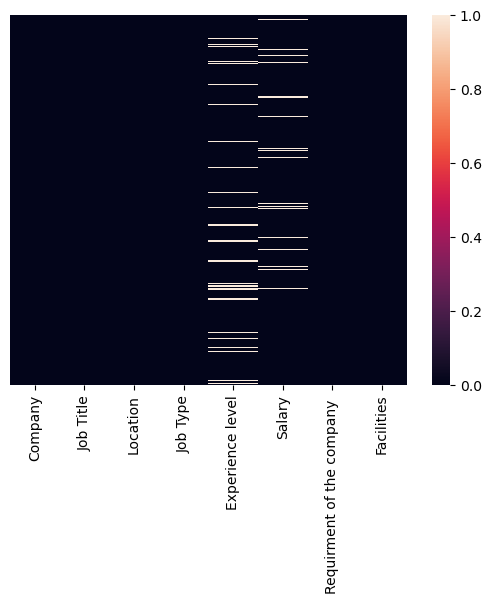

In [18]:
sns.heatmap(df.isnull() , yticklabels = False)

## Data Cleanning 

### Define The Missing Values Keys 

In [19]:
missing_values = ["Nan","n/a","null"  ,np.nan]

In [20]:
df = pd.read_csv('job.csv' , na_values = missing_values , encoding = 'unicode_escape' )

### Getting the duplicates rows number

In [21]:
print(f"The number of duplicated rows is : {df.duplicated().sum()} Rows")

The number of duplicated rows is : 202 Rows


#### Dropping the duplicated rows 

In [22]:
df = df.drop_duplicates()

In [23]:
print(f" Remaining Rows : {df.shape[0]} ")

 Remaining Rows : 2996 


For First , Im gonna process some columns , in order to use theme to fill the missing Experience_Level Column 

## Processing Columns 

### Treate Experience_Level Column

<Axes: >

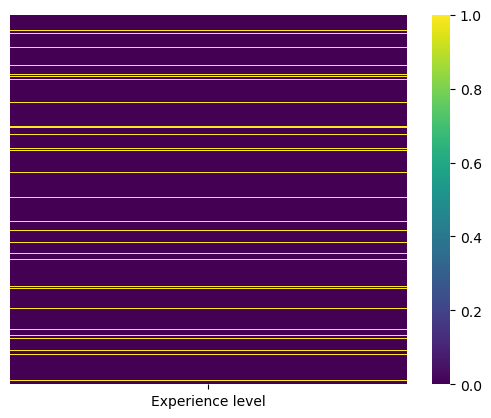

In [24]:
sns.heatmap(df[['Experience level']].isnull(), yticklabels = False, cmap='viridis')

In [25]:
df[['Experience level']].isnull().sum()

Experience level    228
dtype: int64

### Dropping The Null Values In The Experience level Column 

In [26]:
df.dropna(subset=['Experience level'], axis=0, inplace=True)

In [27]:
df["Experience level"] = df["Experience level"].str.split('-').str[0]

In [28]:
df['Experience level'].replace('Mid', 'Midlle', inplace = True)

## Processing Salary Column 

#### Fill The Missing Values In The Salary Column 

In [29]:
def extract_currency_code(salary_str):
    currency_pattern = re.compile(r'\b(?:USD|GBP|EUR)\b')
    matches = currency_pattern.findall(salary_str)
    return matches[0] if matches else 'USD'

def convert_to_dollars(salary_str):
    try:
        salary_str = str(salary_str)
        currency_code = extract_currency_code(salary_str)
        numeric_part = re.findall(r'\d+', salary_str)
        numeric_value = int(numeric_part[0]) if numeric_part else 0

        message = ""

        if currency_code != 'USD':
            api_url = f'https://v6.exchangerate-api.com/v6/5ba7ecd8de8cceec0eda68a4/latest/{currency_code}'
            try:
                response = requests.get(api_url)
                response.raise_for_status()
                data = response.json()
                exchange_rates = data['conversion_rates']
                
            except (requests.RequestException, ValueError, KeyError):
                message = f"Error occurred while fetching exchange rates for {currency_code}. Using default rate of 1.0."
                exchange_rates = {'USD': 1.0, 'GBP': 1.0, 'EUR': 1.0}
            else:
                message = f"Conversion from {currency_code} to USD succeeded."
                print(message)
            exchange_rate = exchange_rates.get('USD', 1.0)
            if exchange_rate == 1.0:
                message = f"Exchange rate not available for {currency_code}. Using default rate of 1.0."
            numeric_value *= exchange_rate

        return float(numeric_value * 1000)

    except ValueError:
        message = f"Invalid value for {salary_str}. Returning as is."
        return float(salary_str)
    

In [32]:
df['Salary'] = df['Salary'].apply(convert_to_dollars)

Conversion from EUR to USD succeeded.
Conversion from GBP to USD succeeded.
Conversion from EUR to USD succeeded.
Conversion from EUR to USD succeeded.
Conversion from EUR to USD succeeded.
Conversion from EUR to USD succeeded.
Conversion from GBP to USD succeeded.
Conversion from GBP to USD succeeded.
Conversion from EUR to USD succeeded.
Conversion from GBP to USD succeeded.
Conversion from EUR to USD succeeded.
Conversion from GBP to USD succeeded.
Conversion from GBP to USD succeeded.
Conversion from GBP to USD succeeded.
Conversion from GBP to USD succeeded.
Conversion from GBP to USD succeeded.
Conversion from GBP to USD succeeded.
Conversion from GBP to USD succeeded.
Conversion from GBP to USD succeeded.
Conversion from GBP to USD succeeded.


### Rename The Salary Column To Include The Currency 

In [33]:
df.rename(columns={'Salary': 'Salary(USD)'}, inplace=True)

In [34]:
df['Salary(USD)'].replace(0, np.nan, inplace=True)

<Axes: >

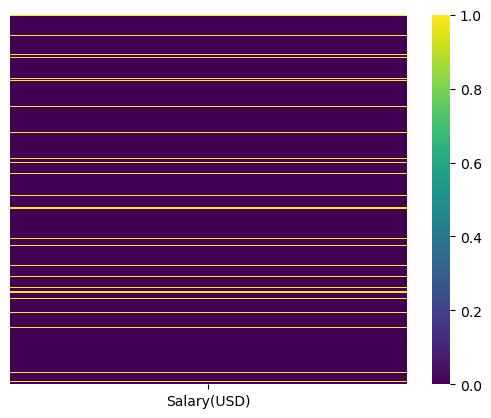

In [35]:
sns.heatmap(df[['Salary(USD)']].isnull(), yticklabels = False, cmap='viridis')

#### Treat The Missing Values 

In [36]:
mean_salaries = df.groupby('Experience level')['Salary(USD)'].mean()

df['Salary(USD)'] = df.apply(lambda row: mean_salaries[row['Experience level']] if pd.isna(row['Salary(USD)']) else row['Salary(USD)'], axis=1)

In [37]:
print(f"Rmaining :  {df.shape[0]} Rows \ {df.shape[1]} Columns")

Rmaining :  2768 Rows \ 8 Columns


## Treate  Requirment Column 

In [38]:
df['Requirment of the company '] = df['Requirment of the company '].str.split(',')
df['Requirment of the company '] = df['Requirment of the company '].apply(lambda x: [item.strip() for item in x if item.strip()])

## Treate Facilities column 

In [39]:
df['Facilities'] = df['Facilities'].apply(lambda x: re.sub(r',{2,}', '', x))

In [40]:
df['Facilities'] = df['Facilities'].str.split(',')

## Treate The Location Column 

### Extracting The Countries Names 

In [41]:
def extract_country(location):
    geo_text = GeoText(location)
    countries = list(geo_text.countries)
    if countries:
        return countries[0], location.replace(countries[0], str(countries[0])).strip()
    else:
        return None, location

df[['Country', 'Location']] = df['Location'].apply(extract_country).apply(pd.Series)

### Extracting The Cities Names 

In [42]:
def extract_city(location):
    geo_text = GeoText(location)
    cities = list(geo_text.cities)
    if cities:
        return cities[0], location.replace(cities[0], '').strip()
    else:
        return None, location

df[['City', 'Location']] = df['Location'].apply(extract_city).apply(pd.Series)

### Filling The Missing Countries Names Using Cities Column 

In [43]:
def get_country_from_city(city):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": city,
        "format": "json",
    }
    headers = {
        "accept-language": "en"
    }

    try:
        response = requests.get(base_url, params=params, headers=headers)
        response.raise_for_status()
        data = response.json()
        print(f"API Response for '{city}':")
        
        for result in data:
            country = result.get("display_name").split(",")[-1].strip()
            print(country)
            return country  # Add this line to explicitly return the country name
            break
        
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
        return "Error"

In [44]:
for index, row in df[df['Country'].isnull() & df['City'].notnull()].iterrows():
    city = row['City']
    country = get_country_from_city(city)
    df.at[index, 'Country'] = country

API Response for 'Tallinn':
Estonia
API Response for 'Lehi':
United States
API Response for 'Los Angeles':
United States
API Response for 'Indianapolis':
United States
API Response for 'Cardiff':
United Kingdom
API Response for 'San Francisco':
United States
API Response for 'Arlington':
United States
API Response for 'Dubai':
United Arab Emirates
API Response for 'New York':
United States
API Response for 'Toronto':
Canada
API Response for 'London':
United Kingdom
API Response for 'Los Angeles':
United States
API Response for 'Menlo Park':
United States
API Response for 'Hyderabad':
India
API Response for 'Newark':
United States
API Response for 'Los Angeles':
United States
API Response for 'Toronto':
Canada
API Response for 'Lehi':
United States
API Response for 'New York':
United States
API Response for 'Redmond':
United States
API Response for 'San Francisco':
United States
API Response for 'San Francisco':
United States
API Response for 'Washington':
United States
API Response for

### Recognize The Job Type From Location Column 

In [45]:
def set_job_type(row):
    if re.search(r'\bremote\b', row['Location'], re.IGNORECASE):
        return 'Remote'
    else:
        return 'face-to-face'

df['work setups'] = df.apply(set_job_type, axis=1)

### Fix The Remote Values 

In [46]:
def fill_Remote(row):
    if re.search(r'\bremote\b', row['Job Type'], re.IGNORECASE) and pd.isnull(row['Country']) and pd.isnull(row['City']):
        return 'WorldWide', 'WorldWide'
    return row['Country'], row['City']

df['Country'], df['City'] = zip(*df.apply(fill_Remote, axis=1))

In [47]:
df.isna().sum()

Company                         0
Job Title                       0
Location                        0
Job Type                        0
Experience level                0
Salary(USD)                     0
Requirment of the company       0
Facilities                      0
Country                       228
City                          758
work setups                     0
dtype: int64

<Axes: >

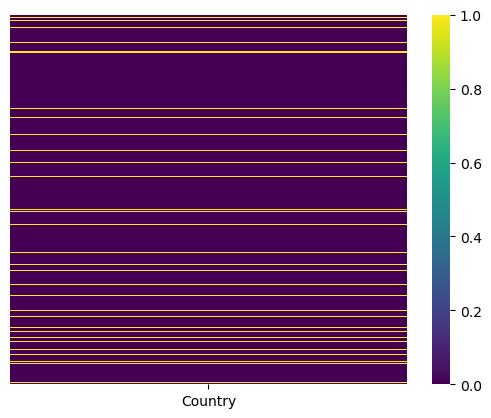

In [48]:
sns.heatmap(df[['Country']].isnull(), yticklabels = False, cmap='viridis')

<Axes: >

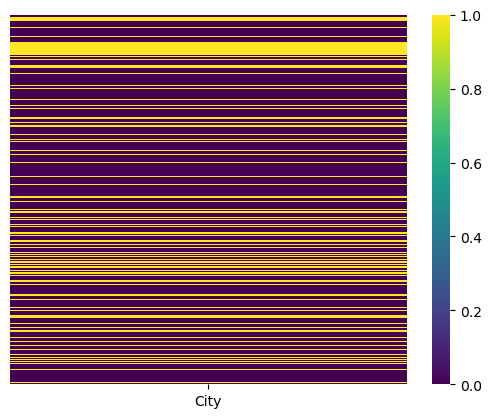

In [49]:
sns.heatmap(df[['City']].isnull(), yticklabels = False, cmap='viridis')

### Dropping The Missing Rows That Contain Missing Information About Cities And Countries 

In [50]:
df.dropna(subset=['City' , 'Country'], inplace = True)
df.reset_index(drop=True, inplace=True)

### Drop The Location Column 

In [51]:
df.drop('Location', axis=1, inplace=True)

In [52]:
analyze_dataframe(df)

,Column Data Types,Column Valid Values,Column Null Values
Company,object,100.0,0.0
Job Title,object,100.0,0.0
Job Type,object,100.0,0.0
Experience level,object,100.0,0.0
Salary(USD),float64,100.0,0.0
Requirment of the company,object,100.0,0.0
Facilities,object,100.0,0.0
Country,object,100.0,0.0
City,object,100.0,0.0
work setups,object,100.0,0.0


### Treate Job Title Column 

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

job_titles = df['Job Title'].values

categories = {
    'Machine Learning Engineer': [],
    'Artificial Intelligence': [],
    'Big Data Engineer': [],
    'Data Engineer': [],
    'Data Architect': [],
    'Data Product Manager': [],
}


preprocessed_titles = [" ".join(title.lower().split()) for title in job_titles]

# Use TF-IDF vectorizer to transform job titles into feature vectors with both unigrams and bigrams

vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Consider both unigrams and bigrams
tfidf_matrix = vectorizer.fit_transform(preprocessed_titles)

# Get the feature names (words and bigrams)
feature_names = vectorizer.get_feature_names_out()

# Iterate through each category and identify the top keywords : 

for category in categories.keys():
    
    # Get the indices of job titles belonging to this category
    indices = [i for i, title in enumerate(job_titles) if category in title]
    
    if len(indices) > 0:
        
        # Compute the average TF-IDF score for each word/bigram across all job titles in the category
        avg_tfidf_scores = np.mean(tfidf_matrix[indices], axis=0).A1
        
        # Get the indices of top keywords (words/bigrams with highest average TF-IDF scores)
        top_keyword_indices = avg_tfidf_scores.argsort()[::-1][:20] 
        
        # Get the top keywords from feature names
        top_keywords = [feature_names[idx] for idx in top_keyword_indices]
        categories[category] = top_keywords

#Print the keywords for each category
for category, keywords in categories.items():
    # save in a table
    category
    print(f"Category: {category}")
    print("Keywords:", keywords)
    print()

Category: Machine Learning Engineer
Keywords: ['learning engineer', 'machine learning', 'machine', 'learning', 'engineer', 'senior machine', 'senior', 'principal machine', 'staff machine', 'principal', 'staff', 'engineer modeling', 'engineer intern', 'sr machine', 'modeling', 'sr', 'engineer ii', 'intern', 'ii', 'simulation']

Category: Artificial Intelligence
Keywords: ['artificial intelligence', 'artificial', 'intelligence', 'director artificial', 'intelligence machine', 'machine learning', 'machine', 'director', 'learning', 'lead kpmg', 'kpmg', 'kpmg futures', 'futures', 'intelligence lead', 'and machine', 'engineer', 'intelligence and', 'lead', 'technical', 'program']

Category: Big Data Engineer
Keywords: ['big', 'big data', 'data engineer', 'senior big', 'engineer', 'data', 'sr big', 'engineer pyspark', 'pyspark', 'engineer cib', 'cib', 'sr', 'senior', 'engineer dataset', 'engineer deep', 'engineer datasets', 'engineer datastores', 'engineer databricks', 'engineer denied', 'engin

### Filling The Job Title Column 

In [54]:
def detect_category_with_spacy(job_title):
    
    categories = {
        'Machine Learning Engineer': ['learning engineer', 'machine learning', 'machine', 'learning', 'engineer', 'senior machine', 'senior', 'staff machine', 'staff', 'principal machine', 'principal', 'engineer modeling', 'sr', 'engineer intern', 'sr machine', 'modeling', 'engineer ii', 'intern', 'ii', 'simulation'],
        'Artificial Intelligence': ['artificial', 'artificial intelligence', 'intelligence', 'director artificial', 'intelligence machine', 'machine learning', 'machine', 'director', 'learning', 'lead kpmg', 'futures', 'kpmg', 'kpmg futures', 'intelligence lead', 'and machine', 'intelligence and', 'engineer', 'lead', 'technical', 'program'],
        'Big Data Engineer': ['big', 'big data', 'data engineer', 'senior big', 'engineer', 'data', 'sr big', 'engineer pyspark', 'pyspark', 'engineer cib', 'cib', 'sr', 'senior', 'engineer dubai', 'engineer dsp', 'engineer driven', 'engineer economy', 'engineer editing', 'engineer elasticsearch', 'engineer ecommerce'],
        'Data Architect': ['data architect', 'architect', 'data', 'senior data', 'senior', 'azure', 'azure data', 'enterprise data', 'principal data', 'principal', 'based', 'enterprise', 'cloud data', 'remote', 'staff data', 'cloud', 'data architecture', 'architecture', 'staff', 'architect databricks'],
        'Data Product Manager': ['data product', 'product manager', 'product', 'manager', 'senior data', 'manager trading', 'trading experience', 'data', 'trading', 'experience', 'senior', 'key people', 'link key', 'manager link', 'key', 'link', 'sr data', 'people', 'sr', 'engineer dlp'],
    }
    
    job_title_lower = job_title.lower()

    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in job_title_lower:
                return category

    return 'Other'

In [55]:
df['Job Post'] = df['Job Title'].apply(detect_category_with_spacy)

In [56]:
df.drop('Job Title', axis=1, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2010 non-null   object 
 1   Job Type                    2010 non-null   object 
 2   Experience level            2010 non-null   object 
 3   Salary(USD)                 2010 non-null   float64
 4   Requirment of the company   2010 non-null   object 
 5   Facilities                  2010 non-null   object 
 6   Country                     2010 non-null   object 
 7   City                        2010 non-null   object 
 8   work setups                 2010 non-null   object 
 9   Job Post                    2010 non-null   object 
dtypes: float64(1), object(9)
memory usage: 157.2+ KB


# Data visualisation 

In [58]:
!pip3 install geopandas --quiet

In [59]:
!pip3 install folium --quiet

In [60]:
import pandas as pd
import geopandas as gpd
import folium
import io
import requests
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, GeoJSONDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral11 ,Category10, Category20
from itertools import cycle
from math import pi
from bokeh.palettes import Spectral6
from bokeh.models import FactorRange

### Map of job vacancies by country


/var/folders/7c/jvjqk5q52b9bqx8160bdrh8r0000gn/T/ipykernel_2157/2302501535.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


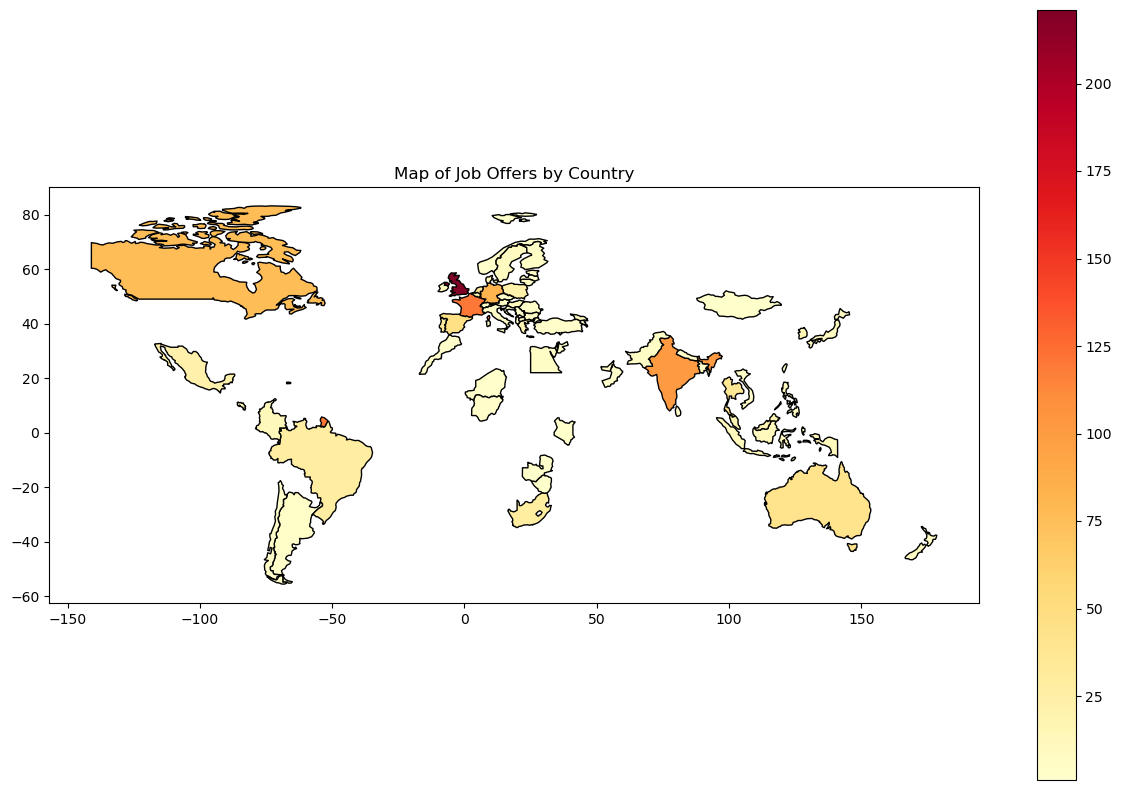

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

job_vacancies_by_country = df.groupby('Country').size().reset_index(name='Job Vacancies')

world = world.merge(job_vacancies_by_country, left_on='name', right_on='Country')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Job Vacancies', ax=ax, legend=True, cmap='YlOrRd', edgecolor='black')
ax.set_title('Map of Job Offers by Country')
plt.show()


## Bar Plot :  job offers by company


In [62]:
output_notebook()

job_count_by_company = df['Company'].value_counts().reset_index(name='Job Count')
job_count_by_company.columns = ['Company', 'Job Count']

job_count_by_company = job_count_by_company.sort_values(by='Job Count', ascending=False)

top_5_companies = job_count_by_company.head(20)

palette = list(Spectral11) + ["gray"] * (len(top_5_companies) - len(Spectral11))
palette = tuple(palette)
p = figure(x_range=top_5_companies['Company'], plot_height=400, plot_width=800,
           title="Job Offers By Company", toolbar_location=None, tools="",
           sizing_mode="scale_width")  # Setting sizing_mode to "scale_width" for responsive width

source = ColumnDataSource(top_5_companies)

tooltips = [("Entreprise", "@Company"), ("Nombre d'offres", "@{Job Count}")]

p.add_tools(HoverTool(tooltips=tooltips))

p.vbar(x='Company', top='Job Count', width=0.9, source=source,
       line_color='white', fill_color=factor_cmap('Company', palette=palette, factors=top_5_companies['Company']))

p.xaxis.major_label_orientation = np.pi / 5  
p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)


Loading BokehJS ...

### Pie Chart : Distribution Of JobType 

In [63]:
df['work setups'].unique()

array(['face-to-face', 'Remote'], dtype=object)

In [64]:
grouped = df['work setups'].value_counts()

data = pd.DataFrame({'license': grouped.index, 'count': grouped.values})
data['percentage'] = data['count'] / data['count'].sum() * 100

palette_size = len(grouped)
colors = cycle(Category10[3])
data['color'] = [next(colors) for _ in range(palette_size)]

p = figure(plot_height = 500, plot_width=600, title='Percentage of Repositories by License Type', toolbar_location=None,
           tools="hover", tooltips="@license: @count Job (@percentage%)")

angles = data['percentage'] / 100 * 2 * pi
angles = angles.cumsum()
data['start_angle'] = [0] + list(angles[:-1])
data['end_angle'] = list(angles)

p.wedge(x=0, y=0, radius=0.7, start_angle='start_angle', end_angle='end_angle',
        line_color='white', fill_color='color', legend_field='license', source=data)

p.legend.location = "top_left"
p.legend.orientation = "vertical"
p.legend.label_text_font_size = '10pt'

p.xgrid.visible = False
p.ygrid.visible = False

p.legend.location = "top_left"


output_notebook()
show(p)

Loading BokehJS ...

### Pie Chart : Distribution Of Expereience_Level  


In [65]:
df['Experience level'].unique()

array(['Entry', 'Midlle', 'Senior', 'Executive'], dtype=object)

In [66]:
grouped = df['Experience level'].value_counts()

data = pd.DataFrame({'license': grouped.index, 'count': grouped.values})
data['percentage'] = data['count'] / data['count'].sum() * 100

palette_size = len(grouped)
colors = cycle(Category20[20])
data['color'] = [next(colors) for _ in range(palette_size)]

p = figure(plot_height=500, plot_width=600, title='Distribution Of Expereience_Level ', toolbar_location=None,
           tools="hover", tooltips="@license: @count repositories (@percentage%)")

angles = data['percentage'] / 100 * 2 * pi
angles = angles.cumsum()
data['start_angle'] = [0] + list(angles[:-1])
data['end_angle'] = list(angles)

p.wedge(x=0, y=0, radius=0.7, start_angle='start_angle', end_angle='end_angle',
        line_color='white', fill_color='color', legend_field='license', source=data)

p.legend.location = "top_left"
p.legend.orientation = "vertical"
p.legend.label_text_font_size = '10pt'

p.xgrid.visible = False
p.ygrid.visible = False

p.legend.location = "top_left"

output_notebook()
show(p)

Loading BokehJS ...

### Bar Plot - Salary distribution for different job times.

In [67]:
experience_count = df['Experience level'].value_counts()

experience_count = experience_count.sort_index()

source = ColumnDataSource(data=dict(x=experience_count.index, counts=experience_count.values))

colors = factor_cmap('x', palette=Spectral6, factors=experience_count.index)

p = figure(x_range=FactorRange(*experience_count.index), plot_height=300, plot_width=500,
           title='Experience Level Distribution', toolbar_location=None, tools='')

p.vbar(x='x', top='counts', width=0.9, color=colors, source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1.2
p.yaxis.axis_label = 'Count'

hover = HoverTool()
hover.tooltips = [("Experience Level", "@x"), ("Count", "@counts")]
p.add_tools(hover)

# Show the plot
show(p)

### Bar Chart: Salaries Distribution By Experience Level  

In [68]:
salary_by_experience = df['Salary(USD)'].groupby(df['Experience level']).mean()

salary_by_experience = salary_by_experience.sort_index()

source = ColumnDataSource(data=dict(x=salary_by_experience.index, salary=salary_by_experience.values))

colors = factor_cmap('x', palette=Spectral6, factors=salary_by_experience.index)

p = figure(x_range = FactorRange(*salary_by_experience.index), plot_height=300, plot_width=500,
           title = 'Salary Distribution by Experience Level', toolbar_location=None, tools='')

p.vbar(x='x', top='salary', width=0.9, color=colors, source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1.2
p.yaxis.axis_label = 'Average Salary'

hover = HoverTool()
hover.tooltips = [("Experience Level", "@x"), ("Average Salary", "@salary{$0,0}")]
p.add_tools(hover)

# Show the plot
show(p)

### Répartition des types de poste par pays (Top 20) 

In [69]:


job_type_by_country = df.groupby(['Country', 'Job Type']).size().unstack(fill_value=0)

job_type_by_country['Total'] = job_type_by_country.sum(axis=1)

for col in job_type_by_country.columns[:-1]:
    job_type_by_country[col] = (job_type_by_country[col] / job_type_by_country['Total']) * 100

job_type_by_country.reset_index(inplace=True)

job_type_by_country = job_type_by_country.sort_values('Total', ascending=False)

top_20_countries = job_type_by_country.head(20)

job_types = list(top_20_countries.columns[1:-1])

job_types.remove("Full Time")
job_types.append("Full Time")

countries = top_20_countries['Country'].tolist()

data = dict(
    countries=countries,
    **{job_type: top_20_countries[job_type].tolist() for job_type in job_types}
)

palette = Spectral11[:len(job_types)]

p = figure(x_range=countries, plot_height=400, plot_width=800,
           title="Répartition des types de poste par pays (Top 20)", toolbar_location=None, tools="",
           sizing_mode="scale_width")  # Setting sizing_mode to "scale_width" for responsive width

source = ColumnDataSource(data=data)

p.vbar_stack(job_types, x='countries', width=0.9, color=palette, source=source,
             legend_label=job_types)

p.legend.title = 'Job Type'
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
p.legend.click_policy = "hide"

tooltips = [("Country", "@countries")]
for job_type in job_types:
    tooltips.append((job_type, f"@{{{job_type}}}%"))

hover = HoverTool(tooltips=tooltips)
p.add_tools(hover)

p.xaxis.major_label_orientation = np.pi / 5  
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.axis_label = "Pourcentage (%)"

# Show the plot
output_notebook()
show(p)


Loading BokehJS ...

### Bar Plot - Count of job JobTitle

In [70]:
jobtitle_count = df['Job Post'].value_counts()

jobtitle_count = jobtitle_count.sort_values(ascending=False)

source = ColumnDataSource(data=dict(jobtitle=list(jobtitle_count.index), counts=jobtitle_count.values))

colors = factor_cmap('jobtitle', palette=Spectral11, factors=list(jobtitle_count.index))

p = figure(x_range=list(jobtitle_count.index), plot_height=400, plot_width=500,
           title='Count of Job Titles', toolbar_location=None, tools='')

p.vbar(x='jobtitle', top='counts', width=0.5, color=colors, source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1
p.yaxis.axis_label = 'Count'

hover = HoverTool()
hover.tooltips = [("Job Title", "@jobtitle"), ("Count", "@counts")]
p.add_tools(hover)

show(p)

### Box Plot - Salary distribution by jobtitle 

In [71]:
salary_by_experience = df['Salary(USD)'].groupby(df['Job Post']).mean()

salary_by_experience = salary_by_experience.sort_index()

source = ColumnDataSource(data=dict(x = salary_by_experience.index, salary = salary_by_experience.values))

colors = factor_cmap('x', palette=Spectral6, factors=salary_by_experience.index)

p = figure(x_range = FactorRange(*salary_by_experience.index), plot_height=500, plot_width=500,
           title = 'Salary Distribution by Experience Level', toolbar_location=None, tools='')

p.vbar(x='x', top='salary', width=0.9, color=colors, source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1.2
p.yaxis.axis_label = 'Average Salary'

hover = HoverTool()
hover.tooltips = [("Experience Level", "@x"), ("Average Salary", "@salary{$0,0}")]
p.add_tools(hover)

# Show the plot
show(p)

### Requirements by Job Type 

In [72]:
Requirment_flat = [req for sublist in df['Requirment of the company '] for req in sublist]
Requirment_counts = pd.Series(Requirment_flat).value_counts()
Requirment_counts

Computer Science    715
Engineering         654
AWS                 560
Architecture        488
Data analysis       372
                   ... 
Pentaho               1
NLG                   1
Fortran               1
ITIL                  1
Maven                 1
Length: 265, dtype: int64

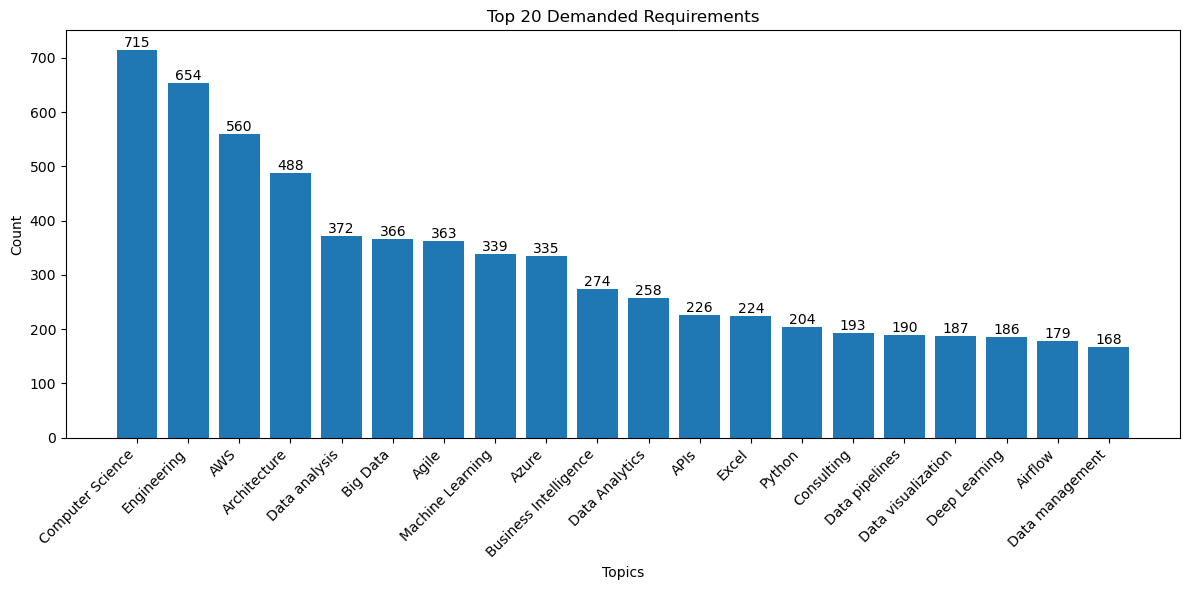

In [73]:
top_n = 20
top_Requirment = Requirment_counts.head(top_n)

plt.figure(figsize=(12, 6))

bars = plt.bar(top_Requirment.index, top_Requirment.values)

plt.title(f'Top {top_n} Demanded Requirements')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()

###  Distribution of Salaries By Country

In [74]:
salary_by_experience = df['Salary(USD)'].groupby(df['Country']).mean()

salary_by_experience = salary_by_experience.sort_index().head(10)

source = ColumnDataSource(data = dict(x = salary_by_experience.index, salary = salary_by_experience.values))

colors = factor_cmap('x', palette = Spectral11, factors=salary_by_experience.index)

palette = Spectral11[:len(salary_by_experience)]

p = figure(x_range = FactorRange(*salary_by_experience.index), plot_height=500, plot_width=500,
           title = 'Salary Distribution by Experience Level', toolbar_location=None, tools='')

p.vbar(x='x', top='salary', width=0.9, color=colors, source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1.2
p.yaxis.axis_label = 'Average Salary'

hover = HoverTool()
hover.tooltips = [("Country", "@x"), ("Average Salary", "@salary{$0,0}")]
p.add_tools(hover)

show(p)

### Stacked Bar Plot - Experience level distribution in each country.

In [75]:
experience_counts = df.groupby(['Country', 'Experience level']).size().reset_index(name='Count')

pivot_df = experience_counts.pivot(index='Country', columns='Experience level', values='Count').fillna(0)

countries = pivot_df.index.tolist()[:20]
experience_levels = pivot_df.columns.tolist()

data = {
    'Country': countries
}

data.update({level: pivot_df[level].tolist()[:20] for level in experience_levels})  # Update data for first 20 countries

colors = Category20[len(experience_levels)]

source = ColumnDataSource(data=data)

p = figure(x_range=countries, plot_height = 550, plot_width = 900, title= 'Experience Level Distribution in Each Country ',
           toolbar_location=None, tools="", y_axis_label="Count")

bars = p.vbar_stack(experience_levels, x='Country', width=0.9, color=colors, source=source,
                   legend_label=experience_levels)

p.y_range.start = 0
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_left"
p.legend.title = "Experience Level"
p.xaxis.major_label_orientation = 1.2

hover = HoverTool(tooltips=[("Experience Level", "$name"), ("Count", "@{$name}")], mode='vline')
p.add_tools(hover)

output_notebook()
show(p)


Loading BokehJS ...

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2010 non-null   object 
 1   Job Type                    2010 non-null   object 
 2   Experience level            2010 non-null   object 
 3   Salary(USD)                 2010 non-null   float64
 4   Requirment of the company   2010 non-null   object 
 5   Facilities                  2010 non-null   object 
 6   Country                     2010 non-null   object 
 7   City                        2010 non-null   object 
 8   work setups                 2010 non-null   object 
 9   Job Post                    2010 non-null   object 
dtypes: float64(1), object(9)
memory usage: 157.2+ KB


# Data Integration 

## Import the necessary libraries 

In [90]:
import mysql.connector 
import ast

In [120]:
mydb = mysql.connector.connect(
    host = "localhost",
    username = "root",
    password = "",
    database = "Job",
)

## Set a cursor connection 

In [121]:
cursor = mydb.cursor()

### Create Requirement Table 

In [ ]:
create_table_Requirement_query = """
CREATE TABLE Requirement (
    requirement_ID INT PRIMARY KEY AUTO_INCREMENT , 
    requirement_Name VARCHAR(500)
);
"""
cursor.execute(create_table_Requirement_query)

### Create facilities Table 

In [ ]:
create_table_facilitie_query = """
CREATE TABLE Facilitie (
    facilitie_ID INT PRIMARY KEY AUTO_INCREMENT , 
    facilitie_Name VARCHAR(500)
);
"""
cursor.execute(create_table_facilitie_query)

### Create Job Table 

In [ ]:
create_table_job_query = """
CREATE TABLE Job (
    job_ID INT PRIMARY KEY AUTO_INCREMENT , 
    requirment_ID INT  , 
    facilitie_ID INT   , 
    job_Title VARCHAR(500),
    work_Setup VARCHAR(500),
    salary Float,
    FOREIGN KEY (requirment_ID) REFERENCES Requirement(requirement_ID),
    FOREIGN KEY (facilitie_ID) REFERENCES Facilitie(facilitie_ID)
);
"""
cursor.execute(create_table_job_query)

### Create Company Table 


In [ ]:
create_table_company_query = """
CREATE TABLE Company (
    company_ID INT PRIMARY KEY AUTO_INCREMENT , 
    company_Name VARCHAR(500)
);
"""
cursor.execute(create_table_company_query)

### Create City Table 

In [ ]:
create_table_City_query = """
CREATE TABLE City (
    city_ID INT PRIMARY KEY AUTO_INCREMENT , 
    company_ID INT ,
    city_Name VARCHAR(500),
    FOREIGN KEY (company_ID) REFERENCES Company(company_ID)

);
"""
cursor.execute(create_table_City_query)

### Create Country Table 

In [ ]:
create_table_Country_query = """
CREATE TABLE Country (
    Country_ID INT PRIMARY KEY AUTO_INCREMENT , 
    city_ID INT ,
    Country_Name VARCHAR(500),
    FOREIGN KEY (city_ID) REFERENCES City(city_ID)
);
"""
cursor.execute(create_table_Country_query)

### Creat Job Association Table 

In [ ]:
create_table_JobAssoc_query = """
CREATE TABLE JobCompanyAssociation (
    job_ID INT,
    company_ID INT,
    PRIMARY KEY (job_ID, company_ID),
    FOREIGN KEY (job_ID) REFERENCES Job(job_ID),
    FOREIGN KEY (company_ID) REFERENCES Company(company_ID)
);
"""
cursor.execute(create_table_JobAssoc_query)

### Create JobFacilities Association Table 

In [ ]:
create_table_JobFacilities_query = """
CREATE TABLE JobFacilitiesAssociation (
    facilitie_ID INT,
    job_ID INT,
    PRIMARY KEY (facilitie_ID, job_ID),
    FOREIGN KEY (facilitie_ID) REFERENCES Facilitie(facilitie_ID),
    FOREIGN KEY (job_ID) REFERENCES Job(job_ID)
);
"""
cursor.execute(create_table_JobFacilities_query)

### Create JobRequirments Association Table 

In [ ]:
create_table_JobRequirments_query = """
CREATE TABLE JobRequirmentsAssociation (
    requirement_ID INT,
    job_ID INT,
    PRIMARY KEY (requirement_ID, job_ID),
    FOREIGN KEY (requirement_ID) REFERENCES Requirement(requirement_ID),
    FOREIGN KEY (job_ID) REFERENCES Job(job_ID)
);
"""
cursor.execute(create_table_JobRequirments_query)

# Data Insertion 

In [ ]:
df = pd.read_csv('FinalData.csv')

In [ ]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [ ]:
df.info()

### Transform string representation of lists back to lists

In [ ]:
df['Requirment of the company '] = df['Requirment of the company '].apply(ast.literal_eval)
df['Facilities'] = df['Facilities'].apply(ast.literal_eval)

### Inserting The Data

In [ ]:
company_ids = {}
city_ids = {}
country_ids = {}
requirement_ids = {}
facilitie_ids = {}
job_ids = {}

# Insert data into the tables and collect the IDs : 

for _, row in df.iterrows():
    
    # Insert data into Requirement table
    requirements = row['Requirment of the company ']
    for requirement in requirements:
        insert_requirement_query = "INSERT INTO Requirement (requirement_Name) VALUES (%s)"
        cursor.execute(insert_requirement_query, (requirement,))
        requirement_id = cursor.lastrowid
        requirement_ids.setdefault(row.name, []).append(requirement_id)

    # Insert data into Facilitie table
    facilities = row['Facilities']
    for facility in facilities:
        insert_facilitie_query = "INSERT INTO Facilitie (facilitie_Name) VALUES (%s)"
        cursor.execute(insert_facilitie_query, (facility,))
        facilitie_id = cursor.lastrowid
        facilitie_ids.setdefault(row.name, []).append(facilitie_id)

    # Insert data into Job table
    insert_job_query = """
    INSERT INTO Job (requirment_ID, facilitie_ID, job_Title, work_Setup, salary)
    VALUES (%s, %s, %s, %s, %s)
    """
    job_data = (requirement_ids[row.name][-1], facilitie_ids[row.name][-1], row['JobTitle'], row['JobType'], row['Salary(USD)'])
    cursor.execute(insert_job_query, job_data)
    job_id = cursor.lastrowid
    job_ids[row.name] = job_id
    
    # Insert data into Company table
    insert_company_query = "INSERT INTO Company (company_Name) VALUES (%s)"
    cursor.execute(insert_company_query, (row['Company'],))
    company_id = cursor.lastrowid
    company_ids[row.name] = company_id

    # Insert data into City table
    insert_city_query = "INSERT INTO City (company_id, city_Name) VALUES (%s, %s)"
    cursor.execute(insert_city_query, (company_id, row['City'],))
    city_id = cursor.lastrowid
    city_ids[row.name] = city_id

    # Insert data into Country table
    insert_country_query = "INSERT INTO Country (city_id, country_Name) VALUES (%s, %s)"
    cursor.execute(insert_country_query, (city_id, row['Country'],))
    country_id = cursor.lastrowid
    country_ids[row.name] = country_id


# Now, insert data into association tables
for name, job_id in job_ids.items():
    for requirement_id in requirement_ids.get(name, []):
        insert_job_requirment_query = "INSERT INTO JobRequirmentsAssociation (requirement_ID, job_ID) VALUES (%s, %s)"
        cursor.execute(insert_job_requirment_query, (requirement_id, job_id))

for name, job_id in job_ids.items():
    for facilitie_id in facilitie_ids.get(name, []):
        insert_job_facilitie_query = "INSERT INTO JobFacilitiesAssociation (facilitie_ID, job_ID) VALUES (%s, %s)"
        cursor.execute(insert_job_facilitie_query, (facilitie_id, job_id))

for name, job_id in job_ids.items():
    company_id = company_ids.get(name)
    if company_id:
        insert_job_company_query = "INSERT INTO JobCompanyAssociation (job_ID, company_ID) VALUES (%s, %s)"
        cursor.execute(insert_job_company_query, (job_id, company_id))

mydb.commit()

# Test Some Queries 

### Retrieve all job titles and their corresponding companies

In [93]:
query = """
SELECT j.job_Title, GROUP_CONCAT(c.company_Name SEPARATOR ', ') AS companies
FROM Job j
JOIN JobCompanyAssociation jca ON j.job_ID = jca.job_ID
JOIN Company c ON jca.company_ID = c.company_ID
GROUP BY j.job_Title;
"""
cursor.execute(query)
result_1 = cursor.fetchall()

In [95]:
df_result_1 = pd.DataFrame(result_1, columns=['Job_Title', 'Companies'])
df_result_1

,Job_Title,Companies
0,Artificial Intelligence,"Believe, Sia Partners, AFRY, Builder.ai, Natix..."
1,Big Data Engineer,"Flink, Netcentric, Dun & Bradstreet, PA Consul..."
2,Data Architect,"Talan, Bosch Group, Tiger Analytics, Learnligh..."
3,Data Product Manager,"Bosch Group, Publicis Groupe, William Osler He..."
4,Machine Learning Engineer,"2K, Syngenta Group, Sertis, Amazon.com, 84.51°..."
5,Other,"Janes, Spotify, NobleAI, CGG, TIKTAL, M47 Labs..."


### Get the total number of jobs for each company

In [129]:
query = """
SELECT c.company_Name, COUNT(jca.job_ID) AS total_jobs
FROM Company c
LEFT JOIN JobCompanyAssociation jca ON c.company_ID = jca.company_ID
GROUP BY c.company_Name 
ORDER BY total_jobs DESC
LIMIT 10;
"""
cursor.execute(query)
result_2 = cursor.fetchall()

In [130]:
df_result_2 = pd.DataFrame(result_2, columns=['Jobs', 'Count'])
df_result_2

,Jobs,Count
0,Publicis Groupe,90
1,Amazon.com,48
2,Block,45
3,Bosch Group,43
4,Experian,25
5,Verisk,24
6,NielsenIQ,23
7,Sia Partners,20
8,Visa,20
9,ServiceNow,20


### Find the average salary for each job title

In [131]:
query = """
SELECT job_Title, AVG(salary) AS avg_salary
FROM Job
GROUP BY job_Title;
"""
cursor.execute(query)
result_3 = cursor.fetchall()

In [132]:
df_result_3 = pd.DataFrame(result_3, columns=['Jobs', 'Salary'])
df_result_3

,Jobs,Salary
0,Artificial Intelligence,73629.929275
1,Big Data Engineer,76581.011017
2,Data Architect,85285.714286
3,Data Product Manager,58142.857143
4,Machine Learning Engineer,101931.994335
5,Other,69827.256338


### List all job titles that require the 'Computer Science' requirement

In [141]:
query = """
SELECT DISTINCT j.job_Title 
FROM Job j
JOIN JobRequirmentsAssociation jra ON j.job_ID = jra.job_ID
JOIN Requirement r ON jra.requirement_ID = r.requirement_ID
WHERE r.requirement_Name = 'Computer Science';
"""
cursor.execute(query)
result_4 = cursor.fetchall()

In [142]:
df_result_4 = pd.DataFrame(result_4, columns=['Jobs'])
df_result_4

,Jobs
0,Big Data Engineer
1,Machine Learning Engineer
2,Artificial Intelligence
3,Other
4,Data Architect
5,Data Product Manager
